In [49]:
# imports
import math as m
import statistics as stat
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
dataset = [8326, 8459, 8765, 8971, 8972, 9380, 9779, 9877, 10126, 10323, 10956, 11163, 11294, 11366, 11486, 11798, 11863, 11964, 12478, 13167, 13392, 13947, 14237,14238, 14387, 14876, 14877, 15256, 15696, 15891, 16673, 16675, 16793, 16973, 16983, 17961, 19362, 19667, 20044, 20144, 20167, 21044, 22167, 23894, 24129, 24383, 27753]
# dataset = [1672,4960,8070,9300,9680,9891,9972,10800,10855,11908,12500,13000,14449,15170,15820,16300,16820,17260,18624,19650,19980,20476,20980,21973,23344,24900,28205,29538,29932,32640,33645,34280,34325,36300,37250,38320]
# dataset = [126300,240000,312300,341400,394700,190500,258900,316200,342700,410900,200900,260500,316400,345000,413200,214900,282100,334100,345400,441200,234300,304900,335100,375400,463800]



In [50]:
#broj intervala
failureNumber = len(dataset)
def getNumberOfIntervals(_failureNumber):
    z1 = m.sqrt(_failureNumber)
    z2 = 1+3.3*(m.log10(_failureNumber))
    z3 = 5*m.log10(_failureNumber)
    return round(stat.mean([z1, z2, z3])) #za sada najbolji nacin koji imam da odredim ovo
    
numberOfIntervals = getNumberOfIntervals(failureNumber)

In [51]:
#sirina intervala 
def getIntervalDistance(_dataset,_numberOfIntervals):
    tmax = _dataset[len(_dataset)-1]
    tmin = _dataset[0]
    return (tmax-tmin)/_numberOfIntervals

intervalDistance = getIntervalDistance(dataset,numberOfIntervals)
print(intervalDistance)

2775.285714285714


In [52]:
failureStep = []#lista otkaza po intervalu
#otkazi za svaki interval 
def getFailuresPerInterval(_dataset,_intervalDistance,_numberOfIntervals):
    _count = 0
    failureCount = 0
    temp = _dataset[0]
    for i in range(0,_numberOfIntervals+1):
        failureStep.append(temp+(i*_intervalDistance))
    k = 0
    test = []
    finalValue = len(failureStep)
    for j in range(1,finalValue):
        if(j == finalValue-1):
            test.append(len(dataset)-sum(test))
            break
        for i in dataset:
            if i < failureStep[j]:
                k += 1
        test.append(k-sum(test))
        k=0
    return test
failuresPerInterval = getFailuresPerInterval(dataset,intervalDistance,numberOfIntervals)
print(failuresPerInterval)

[11, 10, 9, 7, 6, 3, 1]


In [53]:
#ucestanost otkaza za intervale
failureFrequency = []
def getFailureFrequency():
    for i in failuresPerInterval:
        failureFrequency.append(i/sum(failuresPerInterval)*100)
getFailureFrequency()
print(failureFrequency)


[23.404255319148938, 21.27659574468085, 19.148936170212767, 14.893617021276595, 12.76595744680851, 6.382978723404255, 2.127659574468085]


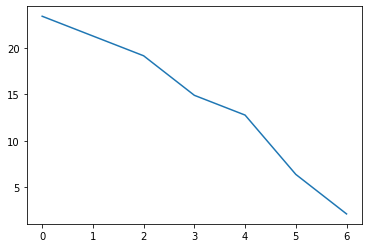

In [54]:
#plot here
plt.plot(failureFrequency)

In [63]:
def getTheCumulativeFrequency(_failureFrequency):
    cf= []
    for i in range(len(_failureFrequency)):
        cf.append(sum(_failureFrequency[:i+1]))
    return cf

TheCumulativeFrequency = getTheCumulativeFrequency(failureFrequency)
print(TheCumulativeFrequency)

[23.404255319148938, 44.68085106382979, 63.829787234042556, 78.72340425531915, 91.48936170212767, 97.87234042553192, 100.0]


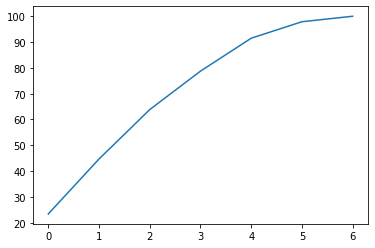

In [56]:
plt.plot(TheCumulativeFrequency)

In [57]:
def getNumberOfFailuresInAgivenInterval(_failuresPerInterval):
    fpi= [] 
    for i in range(len(_failuresPerInterval)):
        fpi.append(sum(_failuresPerInterval[:i+1]))
    return fpi
NumberOfFailuresInAgivenInterval = getNumberOfFailuresInAgivenInterval(failuresPerInterval)
print(NumberOfFailuresInAgivenInterval)

[11, 21, 30, 37, 43, 46, 47]


In [65]:
def getNumberOfUnitsPerInterval(_NumberOfFailuresInAgivenInterval):
    fpi= [] 
    for i in range(len(_NumberOfFailuresInAgivenInterval)):
        fpi.append(failureNumber - _NumberOfFailuresInAgivenInterval[i])
    return fpi
NumberOfUnitsPerInterval = getNumberOfUnitsPerInterval(NumberOfFailuresInAgivenInterval)
print(NumberOfUnitsPerInterval)

[36, 26, 17, 10, 4, 1, 0]


In [73]:
def getNumberOfWorkingUnitsForTheStartOfTheInterval(_NumberOfUnitsPerInterval):
    NumberOfWorkingUnitsForTheStartOfTheInterval = []
    for i in _NumberOfUnitsPerInterval:
        print(i)
        NumberOfWorkingUnitsForTheStartOfTheInterval.append(47-i)
    return NumberOfWorkingUnitsForTheStartOfTheInterval
getNumberOfWorkingUnitsForTheStartOfTheInterval(NumberOfFailuresInAgivenInterval)

#FIX IT

11
21
30
37
43
46
47


[36, 26, 17, 10, 4, 1, 0]

In [59]:
def getTheUnreliability(_NumberOfFailuresInAgivenInterval):
    ur= [] 
    for i in _NumberOfFailuresInAgivenInterval:
        ur.append(i/failureNumber)
    return ur
Unreliability = getTheUnreliability(NumberOfFailuresInAgivenInterval)
print(Unreliability)

[0.23404255319148937, 0.44680851063829785, 0.6382978723404256, 0.7872340425531915, 0.9148936170212766, 0.9787234042553191, 1.0]


In [61]:
def getTheReliability(_NumberOfFailuresInAgivenInterval):
    reliability= [] 
    for i in _NumberOfFailuresInAgivenInterval:
        reliability.append((failureNumber-i)/failureNumber)
    return reliability
Reliability = getTheReliability(NumberOfFailuresInAgivenInterval)
print(Reliability)

[0.7659574468085106, 0.5531914893617021, 0.3617021276595745, 0.2127659574468085, 0.0851063829787234, 0.02127659574468085, 0.0]


In [62]:
def getThefailuresPerIntervalValue(_failuresPerInterval):
    failValue = []
    for i in _failuresPerInterval:
        failValue.append(i/(failureNumber*intervalDistance))
    return failValue
failuresPerIntervalValue = getThefailuresPerIntervalValue(failuresPerInterval)
print(failuresPerIntervalValue)

[8.433097608176381e-05, 7.666452371069438e-05, 6.899807133962494e-05, 5.3665166597486066e-05, 4.5998714226416625e-05, 2.2999357113208313e-05, 7.666452371069438e-06]


In [ ]:
# def FailureIntensity(_intervalDistance,_failuresPerInterval,_):
